# PROYECTO FINAL

La empresa GoGreen Bikesharing, se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica, y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import datetime

PREGUNTAS

¿en que momento del año se alquilan mas bicicletas?

Influye soleado o nubes?

Fin de semana o laborable?

los primeros y ultimos dias del mes hay mas reservas?

festivos aumenta las reservas?

la tempreatura a partir de la cual disminuye los alquileres  ->Punto ruptura

Punto maximo de alquiler

la temperatura alta influye al alquiler de espontaneos o habituales?

la humedad es un punto clave en algun momento? A partir de que punto de humedad bajan drasticamente las reservas?

fecha donde hay mas y menos reservas






In [2]:
df_bike = pd.read_csv("./bikes.csv", index_col=0)
df_bike.sample(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
440,441,17-03-2019,spring,1,3,0,6,0,2,21.080847,25.25230,75.5833,7.417168,3155,4681,7836
714,715,16-12-2019,winter,1,12,0,0,0,2,14.862500,18.49690,83.8750,6.749714,538,3248,3786
338,339,05-12-2018,winter,0,12,0,1,1,2,15.819153,19.69625,82.7083,4.167956,233,3578,3811
529,530,14-06-2019,summer,1,6,0,4,1,1,26.581653,31.21915,56.9583,17.000111,1180,6183,7363
658,659,21-10-2019,winter,1,10,0,0,0,1,19.030847,22.82145,51.0000,11.125618,2132,4692,6824
628,629,21-09-2019,autumn,1,9,0,5,1,1,24.565847,28.59855,66.8750,10.333343,1250,6917,8167


In [3]:
df_bike.mnth.dtype

dtype('int64')

# limpieza string

In [4]:
df_bike.season.unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

# duplicados

In [5]:
df_bike.duplicated().sum()

0

# Nulos

In [6]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


# separando la col DTime en day, month, year

In [8]:
df_bike.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [9]:
df_bike["day"] = df_bike["dteday"].str.split(pat= "-", n = -1, expand = True)[0]

In [10]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [11]:
df_bike=df_bike.reindex(columns=['instant', 'dteday', 'season', 'yr', 'mnth','day', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])

In [12]:
df_bike["day"].dtypes

dtype('O')

In [13]:
df_bike["day"] =df_bike["day"].astype("int64")

In [14]:
df_bike["day"].dtypes

dtype('int64')

In [15]:
df_bike.head()

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,2,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,3,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,4,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,5,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
df_bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [17]:
df_bike.stb.counts().T

,workingday,yr,holiday,weathersit,season,weekday,mnth,day,temp,hum,casual,windspeed,registered,atemp,cnt,dteday,instant
count,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
unique,2,2,2,3,4,7,12,31,498,594,605,649,678,689,695,730,730
most_freq,1,0,0,1,autumn,6,1,1,26.035,61.3333,120,9.041918,4841,32.7344,5409,01-01-2018,1
most_freq_count,499,365,709,463,188,105,62,24,5,4,4,3,3,4,2,1,1
least_freq,0,0,1,3,winter,3,2,31,10.865,79.7083,2290,4.417256,3100,26.3571,5740,01-01-2018,1
least_freq_count,231,365,21,21,178,103,56,14,1,1,1,1,1,1,1,1,1


In [18]:
df_weekday= df_bike.groupby("weekday"), 
df_weekday

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f77c2620820>,)

In [19]:
df_weekday= df_bike.isin()

TypeError: isin() missing 1 required positional argument: 'values'

In [ ]:
frecuentes= df["Name"].value_counts()[0:50]
frecuentes

In [ ]:
values = frecuentes.keys().to_list()
values

In [ ]:
df_name = df[df["Name"].isin(values)]
df_name

# Corregir columna season

In [20]:
df_bike['dteday'] = df_bike['dteday'].apply(pd.to_datetime)

In [21]:
def meses(x):
    a = x.month

    if  a >= 1 and a<=3:
        return 'winter'
    elif a >= 4 and a<=6:
        return 'spring'
    elif a >= 7 and a<=9:
        return 'summer'
    else:
        return 'autumn'

In [22]:
df_bike['season_2'] = df_bike['dteday'].apply(meses)

In [24]:
df_bike.sample(5)

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2
69,70,2018-11-03,spring,0,3,11,0,5,1,2,12.977402,15.25000,64.9565,15.608990,247,1730,1977,autumn
601,602,2019-08-25,autumn,1,8,25,0,6,0,2,27.128347,30.93480,71.2917,16.375336,1829,4224,6053,summer
719,720,2019-12-21,spring,1,12,21,0,5,1,2,13.393347,15.08835,55.6667,25.083661,221,3402,3623,autumn
208,209,2018-07-28,autumn,0,7,28,0,4,1,1,31.945847,36.99500,58.3333,11.958093,606,3784,4390,summer
37,38,2018-07-02,spring,0,2,7,0,1,1,1,11.138347,15.18290,73.8333,3.042356,120,1592,1712,summer


Ahora que la columna season ha sido corregida, ¿qué hacemos con la columna original? ¿La eliminamos? 
 - Antes de codificarla hacemos una gráfica para ver cómo se reparte el alquiler de bicicletas durante las estaciones.

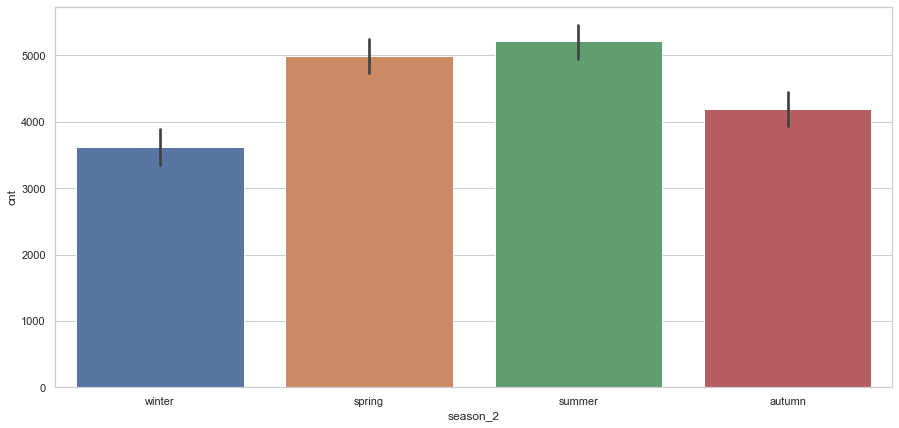

In [25]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="season_2", y="cnt", data=df_bike)

# Tabla viento: encoding

In [26]:
df_bike['wind_interval'] = pd.cut(df_bike['windspeed'], 5, labels=[0,1,2,3,4], ordered=True)

In [27]:
df_bike['wind_interval'] = df_bike['wind_interval'].astype('int64')

 - Al utilizar el método pd.cut nos devuelve una columna categórica, por eso lo cambiamos a tipo int64. Ahora ya tenemos codificada esta columna.

# definir categoricas y numericas
# .reindex las columnas a gusto o uso
# .describe
# .stb.counts()
# .stb.missing()
# pairplot - Busca relaciones - ¿Hay que hacer algun ajuste?
# Boxplot
# Outliers - Identificarlos ¿Que hacer con ellos? %de cada columna
# Heatmap con la relacion
# ajuste lineal multiple
